## REGRESSION: ONE NUMERIC, ONE CATEGORICAL TO PREDICT NUMERIC

A partir del dataSet de Taiwan:


* Visualiza correctamente ( escojiendo el gráfico indicado), el precio en función de la dist al metro y en función de la antiguedad de la vivienda.
* Calcula el modelo para cada una de las variables, y en función de las dos variables conjuntas.
* Muestra gráficamente la regresión lineal del modelo conjunto con sus predicciones.
* Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano.
* Compara el error de los modelos e interperta el resultado.



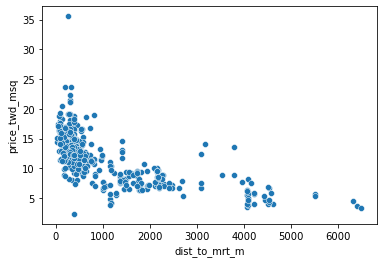

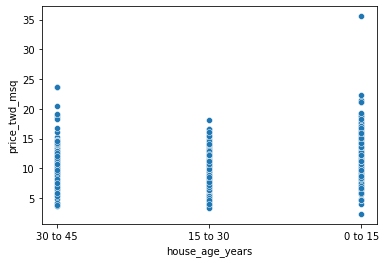

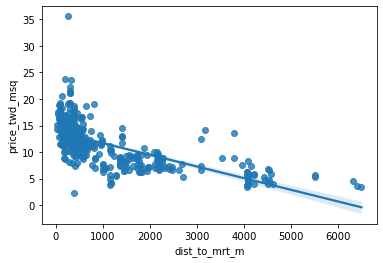

Error del modelo dist_to_mrt:  9.280898491629117
Error del modelo house_age:  15.603952651294033
Error del modelo dist_to_mrt_house_age:  8.784872604480897


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

# Los campos de taiwan.csv son: dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
# Cargar datos
taiwan_df = pd.read_csv("taiwan.csv")

# Visualizar precio en función de la distancia al metro
sns.scatterplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_df)
plt.show()

# Visualizamos el precio en función de la antigüedad de la vivienda
sns.scatterplot(x="house_age_years", y="price_twd_msq", data=taiwan_df)
plt.show()

# Calcula el modelo para cada una de las variables, y en función de las dos variables conjuntas.
dist_to_mrt = ols(formula="price_twd_msq ~ dist_to_mrt_m", data=taiwan_df).fit()
house_age = ols(formula="price_twd_msq ~ house_age_years", data=taiwan_df).fit()
dist_to_mrt_house_age = ols(formula="price_twd_msq ~ dist_to_mrt_m + house_age_years", data=taiwan_df).fit()

# Muestra gráficamente la regresión lineal del modelo conjunto con sus predicciones.
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_df)
plt.show()

# Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano.
predicted_data = pd.DataFrame({'dist_to_mrt_m': [2500]*len(taiwan_df['house_age_years'].unique()), 'house_age_years': taiwan_df['house_age_years'].unique()})
dist_to_mrt_house_age.predict(predicted_data)

# Compara el error de los modelos e interperta el resultado.
print("Error del modelo dist_to_mrt: ", dist_to_mrt.mse_resid)
print("Error del modelo house_age: ", house_age.mse_resid)
print("Error del modelo dist_to_mrt_house_age: ", dist_to_mrt_house_age.mse_resid)




*   Crea un modelo para cada una de las categorias
*   Muestra en un gráfico las predicciones (en negro), respecto el gráfico original con sus linea de regresión.
* Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano. Compara con el apartado anterior
* Compara el error de los modelos e interperta el resultado.





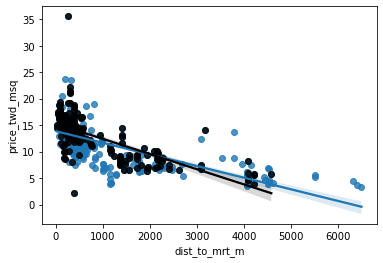

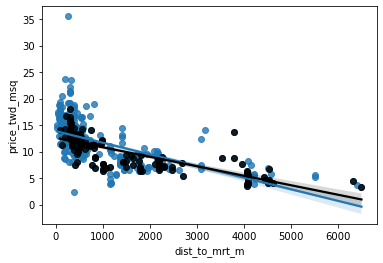

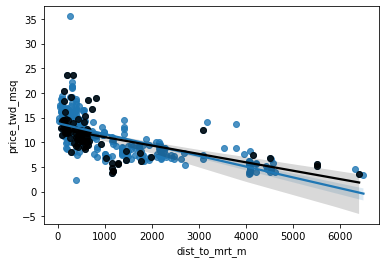

Predicción anterior:  0    7.779153
1    7.809881
2    9.275846
dtype: float64
Predicción para 0 a 15 años:  0    8.114048
dtype: float64
Predicción para 15 a 30 años:  0    8.135577
dtype: float64
Predicción para 30 a 45 años:  0    8.50361
dtype: float64
Error del modelo dist_to_mrt:  9.280898491629117
Error del modelo house_age:  15.603952651294033
Error del modelo dist_to_mrt_house_age:  8.784872604480897
Error del modelo dist_to_mrt_zero_to_fifteen:  9.513188355024372
Error del modelo dist_to_mrt_fifteen_to_thirty:  4.687538725810326
Error del modelo dist_to_mrt_thirty_to_fortyfive:  11.30553867971069


In [35]:
# Crea un modelo para cada una de las categorias
zero_to_fifteen = taiwan_df[taiwan_df['house_age_years'] == "0 to 15"]
fifteen_to_thirty = taiwan_df[taiwan_df['house_age_years'] == "15 to 30"]
thirty_to_fortyfive = taiwan_df[taiwan_df['house_age_years'] == "30 to 45"]

dist_to_mrt_zero_to_fifteen = ols(formula="price_twd_msq ~ dist_to_mrt_m", data=zero_to_fifteen).fit()
dist_to_mrt_fifteen_to_thirty = ols(formula="price_twd_msq ~ dist_to_mrt_m", data=fifteen_to_thirty).fit()
dist_to_mrt_thirty_to_fortyfive = ols(formula="price_twd_msq ~ dist_to_mrt_m", data=thirty_to_fortyfive).fit()

# Muestra en un gráfico las predicciones (en negro), respecto el gráfico original con sus linea de regresión.
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_df)
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=zero_to_fifteen, color="black")
plt.show()

sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_df)
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=fifteen_to_thirty, color="black")
plt.show()

sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=taiwan_df)
sns.regplot(x="dist_to_mrt_m", y="price_twd_msq", data=thirty_to_fortyfive, color="black")
plt.show()

# Predice el precio de una casa con las diferentes antiguedades que se encuentre a una distáncia de 2500 al metro más cercano. Compara con el apartado anterior
zero_to_fifteen_predicted_data = pd.DataFrame({'dist_to_mrt_m': 2500, 'house_age_years': zero_to_fifteen['house_age_years'].unique()})
fifteen_to_thirty_predicted_data = pd.DataFrame({'dist_to_mrt_m': 2500, 'house_age_years': fifteen_to_thirty['house_age_years'].unique()})
thirty_to_fortyfive_predicted_data = pd.DataFrame({'dist_to_mrt_m': 2500, 'house_age_years': thirty_to_fortyfive['house_age_years'].unique()})
print("Predicción anterior: ",dist_to_mrt_house_age.predict(predicted_data))
print("Predicción para 0 a 15 años: ", dist_to_mrt_zero_to_fifteen.predict(zero_to_fifteen_predicted_data))
print("Predicción para 15 a 30 años: ", dist_to_mrt_fifteen_to_thirty.predict(fifteen_to_thirty_predicted_data))
print("Predicción para 30 a 45 años: ", dist_to_mrt_thirty_to_fortyfive.predict(thirty_to_fortyfive_predicted_data))

# Compara el error de los modelos e interperta el resultado.
print("Error del modelo dist_to_mrt: ", dist_to_mrt.mse_resid)
print("Error del modelo house_age: ", house_age.mse_resid)
print("Error del modelo dist_to_mrt_house_age: ", dist_to_mrt_house_age.mse_resid)
print("Error del modelo dist_to_mrt_zero_to_fifteen: ", dist_to_mrt_zero_to_fifteen.mse_resid)
print("Error del modelo dist_to_mrt_fifteen_to_thirty: ", dist_to_mrt_fifteen_to_thirty.mse_resid)
print("Error del modelo dist_to_mrt_thirty_to_fortyfive: ", dist_to_mrt_thirty_to_fortyfive.mse_resid)

## REGRESSION: TWO NUMERIC TO PREDICT NUMERIC

* Crea un gráfico 3D que relacione el precio de las viviendas versus la distáncia al metro y el número de supermercados. Responder V/F:

- El precio de la vivienda disminuye cuando disminuye el número de tienda. V

- Hay una casa con un precio excepcionalmente alto por la cantidad de tiendas de conveniencia cercanas. V

- Cuanto más lejos esté la estación de MRT más cercana, menor será el precio de la vivienda. F

- Tiende a haber una relación positiva entre el número de tiendas de conveniencia y la distancia a la estación MRT más cercana. F


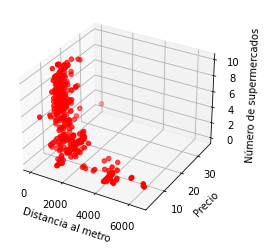

In [63]:
# Crea un gráfico 3D que relacione el precio de las viviendas versus la distáncia al metro y el número de supermercados.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(taiwan_df['dist_to_mrt_m'], taiwan_df['price_twd_msq'], taiwan_df['n_convenience'], c='r', marker='o')
ax.set_xlabel('Distancia al metro')
ax.set_ylabel('Precio')
ax.set_zlabel('Número de supermercados')
plt.show()

# El precio de la vivienda disminuye cuando disminuye el número de tienda.
calculo = taiwan_df.groupby('n_convenience').mean()
calculo['price_twd_msq'].plot()
plt.show()

# Hay una casa con un precio excepcionalmente alto por la cantidad de tiendas de conveniencia cercanas.
sns.scatterplot(x="n_convenience", y="price_twd_msq", data=taiwan_df)
plt.show()

# Cuanto más lejos esté la estación de MRT más cercana, menor será el precio de la vivienda.
print("Precio medio de las viviendas más cercanas al metro: ", taiwan_df[taiwan_df['dist_to_mrt_m'] < taiwan_df['dist_to_mrt_m'].mean()]['price_twd_msq'].mean())
print("Precio medio de las viviendas más lejanas al metro: ", taiwan_df[taiwan_df['dist_to_mrt_m'] > taiwan_df['dist_to_mrt_m'].mean()]['price_twd_msq'].mean())

# Tiende a haber una relación positiva entre el número de tiendas de conveniencia y la distancia a la estación MRT más cercana.
print("La correlación entre el número de tiendas de conveniencia y la distancia a la estación MRT más cercana es: ", taiwan_df['n_convenience'].corr(taiwan_df['dist_to_mrt_m']))

* La idea del anterior punto es que te dieras cuenta que el gráfico 3D dificulta su comprensión. Piensa y dibuja la relación con otro gráfico (2d) que permita sacar mejores conclusiones. (Consejo, como siguen escalas distintas mejor hacer raíz cuadrada de la distáncia)

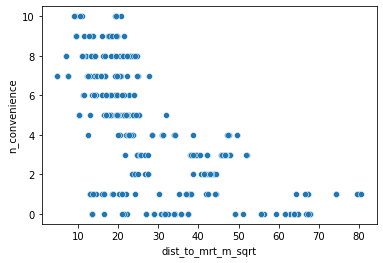

In [68]:
import math
taiwan_df['dist_to_mrt_m_sqrt'] = taiwan_df['dist_to_mrt_m'].apply(lambda x: math.sqrt(x))
sns.scatterplot(x="dist_to_mrt_m_sqrt", y="n_convenience", data=taiwan_df)
plt.show()



Me voy a comprar una casas, dudo entre casas de dos barrio. En el barrio 1 hay 4 supermercados, el barrio dos 3 supermercados. Quiero predecir el precio de las casas para las distancias al metro más cercano de (400, 800 y 1200km).

* Predice su precio de manera conjunta (No una a una). Tip: Usa para predecir el modelo el sqrt de la distancia.
* Muéstra en un gráfico solapado los valores originales y los predecidos usando un color y un marcador distinto.



In [70]:
#Me voy a comprar una casas, dudo entre casas de dos barrio. En el barrio 1 hay 4 supermercados, el barrio dos 3 supermercados. Quiero predecir el precio de las casas para las distancias al metro más cercano de (400, 800 y 1200km).
#* Predice su precio de manera conjunta (No una a una). Tip: Usa para predecir el modelo el sqrt de la distancia.
precio = dist_to_mrt_n.predict(pd.DataFrame({'dist_to_mrt_m_sqrt': [20, 40, 60], 'n_convenience': [4, 3, 3]}))
print("Precio de las casas: ", precio)

#* Muéstra en un gráfico solapado los valores originales y los predecidos usando un color y un marcador distinto.


NameError: name 'dist_to_mrt_n' is not defined

## MULTIPLE REGRESSION



*   Muestra gráficamente el gráfico que relaciona el precio con la distancia y el nuúmero de supermercados para todas la categorias de antiguedad de viviendas. Tip: sns FacetGrid




Respecto a mi duda anterior sobre donde comprarme una casa, las del barrio 1 son todas muy viejas (entre 30 y 45). En cambio las del barrio 2 son nuevas.
Al final me he quedado entre tres opciones:

*   Casa Barrio 1 distancia media al metro (400m)
*   Casa Barrio 2 nueva (4 años) lejana al metro (1000m)
*   Casa Barrio 2 de 23 años de antiguedad y cercana al metro 200m

Prediceme los precios para saber si me las podré permitir:

